# Importing Requried Libraries

In [420]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
data = pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


# Dropping not required Columns

In [422]:
data = data.drop(columns=['Disease'])

In [423]:
data.head()

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [424]:
data.shape

(349, 9)

# Checking the Data Types of the Columns

In [425]:
data.dtypes

Fever                   object
Cough                   object
Fatigue                 object
Difficulty Breathing    object
Age                      int64
Gender                  object
Blood Pressure          object
Cholesterol Level       object
Outcome Variable        object
dtype: object

# Converting categorical variables to numerical values using Label Encounter

In [426]:
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

In [427]:
data.head()

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,1,0,1,1,19,0,1,2,1
1,0,1,1,0,25,0,2,2,0
2,0,1,1,0,25,0,2,2,0
3,1,1,0,1,25,1,2,2,1
4,1,1,0,1,25,1,2,2,1


# Converting Age Column from int64 to int32

In [428]:
data['Age'] = data['Age'].astype('int32')

In [429]:
data.dtypes

Fever                   int32
Cough                   int32
Fatigue                 int32
Difficulty Breathing    int32
Age                     int32
Gender                  int32
Blood Pressure          int32
Cholesterol Level       int32
Outcome Variable        int32
dtype: object

# EDA

In [430]:
data.describe()

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
count,349.000000,349.000000,349.00000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,0.501433,0.478510,0.69341,0.252149,46.323782,0.495702,0.991404,0.951289,0.532951
std,0.500716,0.500255,0.46174,0.434870,13.085090,0.500699,0.975231,0.950154,0.499629
min,0.000000,0.000000,0.00000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.00000,0.000000,45.000000,0.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.00000,1.000000,55.000000,1.000000,2.000000,2.000000,1.000000
max,1.000000,1.000000,1.00000,1.000000,90.000000,1.000000,2.000000,2.000000,1.000000


In [431]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Fever                 349 non-null    int32
 1   Cough                 349 non-null    int32
 2   Fatigue               349 non-null    int32
 3   Difficulty Breathing  349 non-null    int32
 4   Age                   349 non-null    int32
 5   Gender                349 non-null    int32
 6   Blood Pressure        349 non-null    int32
 7   Cholesterol Level     349 non-null    int32
 8   Outcome Variable      349 non-null    int32
dtypes: int32(9)
memory usage: 12.4 KB


In [432]:
data.isnull().sum()

Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [433]:
data.columns

Index(['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age', 'Gender',
       'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')

# Removing Duplicates

In [434]:
data = data.drop_duplicates()

In [435]:
data.shape

(251, 9)

# Distribution of the Age Column

C:\Users\rtaru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


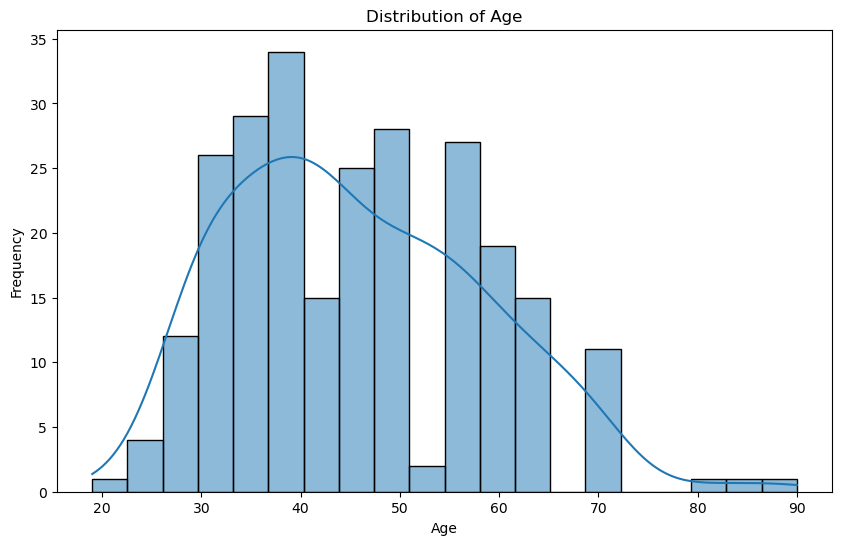

In [436]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Count of Gender

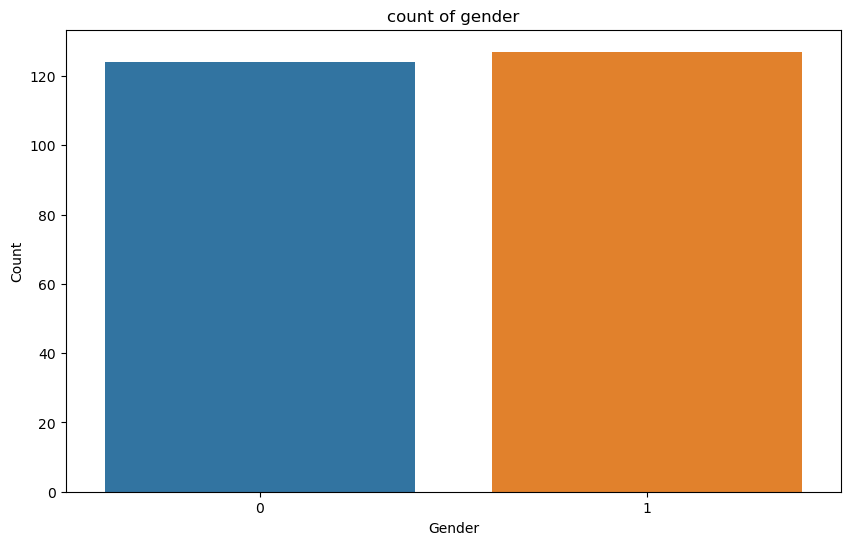

In [437]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender',data=data)
plt.title('count of gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Defining features and target variables

In [438]:
X = data.drop('Outcome Variable', axis=1)
y = data['Outcome Variable']

In [439]:
X.head()

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level
0,1,0,1,1,19,0,1,2
1,0,1,1,0,25,0,2,2
3,1,1,0,1,25,1,2,2
5,1,0,0,0,25,0,2,2
6,1,1,1,1,25,0,2,2


In [440]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [441]:
X_train.head()

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level
253,0,1,1,1,55,0,2,1
37,0,0,1,0,30,0,0,0
169,0,0,0,0,45,0,1,2
197,1,1,1,1,45,1,0,0
203,0,0,1,0,48,1,2,0


In [442]:
y_train.head()

253    0
37     1
169    0
197    1
203    0
Name: Outcome Variable, dtype: int32

In [443]:
y_test.shape

(76,)

# ROC Plot and AUC Scores Common Function

In [444]:
def ROC_Curve_AUC_Score(Classifier, Input_data = X_test, Truth_Values = y_test):
    y_pred = Classifier.predict_proba(Input_data)[:, 1]  # Predict probabilities for positive class
    False_Positive_Rate, True_Positive_Rate, threshold  = roc_curve(Truth_Values, y_pred)
    Auc_Score = auc(False_Positive_Rate, True_Positive_Rate)
    # Plot ROC curve
    
    plt.plot(False_Positive_Rate, True_Positive_Rate, label=f'{Classifier} (AUC = {Auc_Score:.2f})')
    plt.plot([0, 1], [0, 1], '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    print(f"ROC AUC Score : {Auc_Score:.2f}")
    return Auc_Score

# Confusion Matrix Common Function

In [445]:
def Confusion_Matrix(y_preds, Name ,y_test = y_test):
    cm = confusion_matrix(y_test, y_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {Name}')

# Implementing Different Algorithms

# Classifier 1 - Logistic Regression

In [476]:
# Initialize classifiers
logistic_regression_classifier = LogisticRegression()

In [477]:
# Train classifiers
logistic_regression_classifier.fit(X_train, y_train)

LogisticRegression()

In [478]:
#prediction
y_pred_logistic_regression = logistic_regression_classifier.predict(X_test)

In [479]:
len(y_pred_logistic_regression)

76

# Accuracy

In [480]:
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
accuracy_logistic_regression

0.5263157894736842

# Roc Curve, AUC Score and Confusion Matrix for Logistic Regression

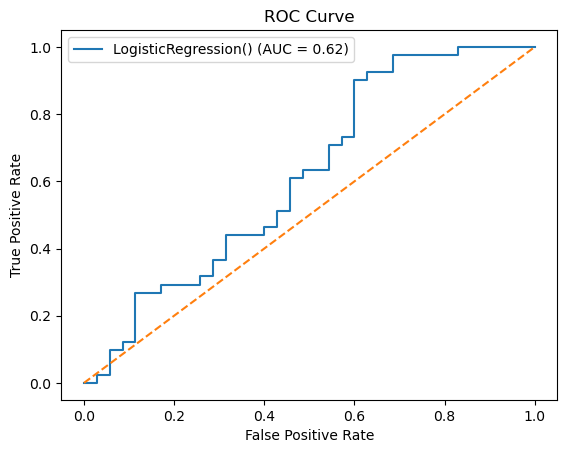

ROC AUC Score : 0.62


In [481]:
Log_Reg_AUC = ROC_Curve_AUC_Score(logistic_regression_classifier)

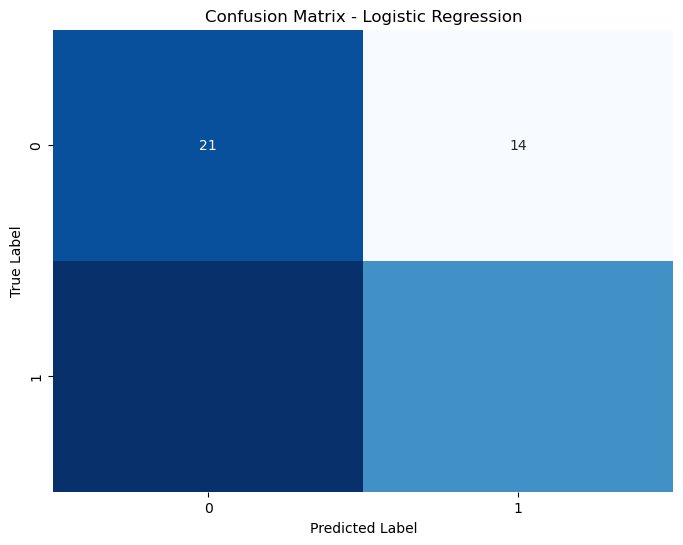

In [482]:
Confusion_Matrix(y_pred_logistic_regression, 'Logistic Regression')

# Classifier 2 - Decision Tree

In [483]:
# Initialize classifiers
decision_tree_classifier = DecisionTreeClassifier()

In [484]:
# Train classifiers
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [485]:
#prediction
y_pred_decision_tree = decision_tree_classifier.predict(X_test)

# Accuracy

In [486]:
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_decision_tree

0.5921052631578947

# Roc Curve, AUC Score and Confusion Matrix for Decision Tree

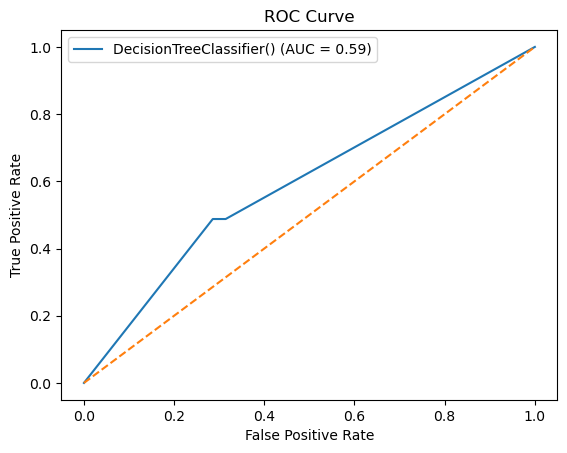

ROC AUC Score : 0.59


In [487]:
Decision_tree_AUC = ROC_Curve_AUC_Score(decision_tree_classifier)

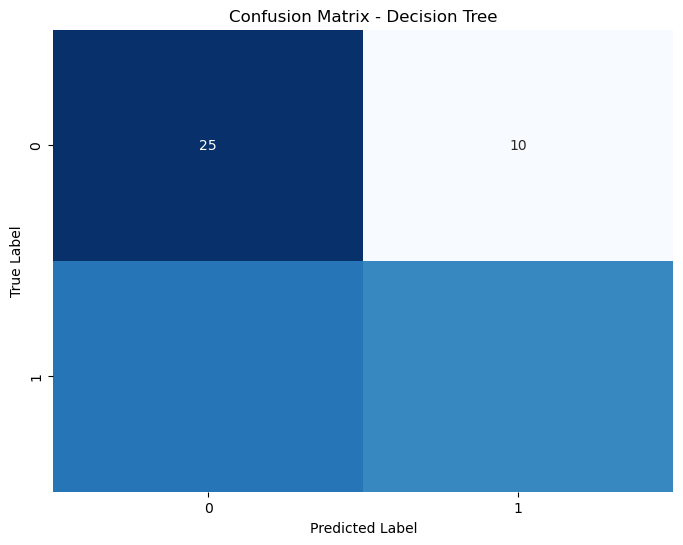

In [488]:
Confusion_Matrix(y_pred_decision_tree, 'Decision Tree')

# Classifier 3 - Ensemble Trees
    - 3.1 Random Forest Tree
    - 3.2 AdaBoost

# 3.1 Random Forest Classifier

In [489]:
# Initialize classifiers
rf_classifier = RandomForestClassifier()

In [490]:
# Train classifiers
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [491]:
#prediction
y_pred_Random_Forest = rf_classifier.predict(X_test)

# Accuracy

In [492]:
accuracy_Random_Forest_Tree = accuracy_score(y_test, y_pred_Random_Forest)
accuracy_Random_Forest_Tree

0.5789473684210527

# Roc Curve, AUC Score and Confusion Matrix for Random Forest Tree

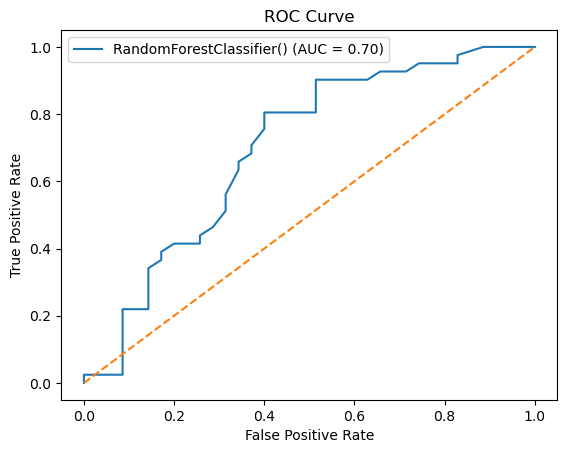

ROC AUC Score : 0.70


In [493]:
rf_AUC = ROC_Curve_AUC_Score(rf_classifier)

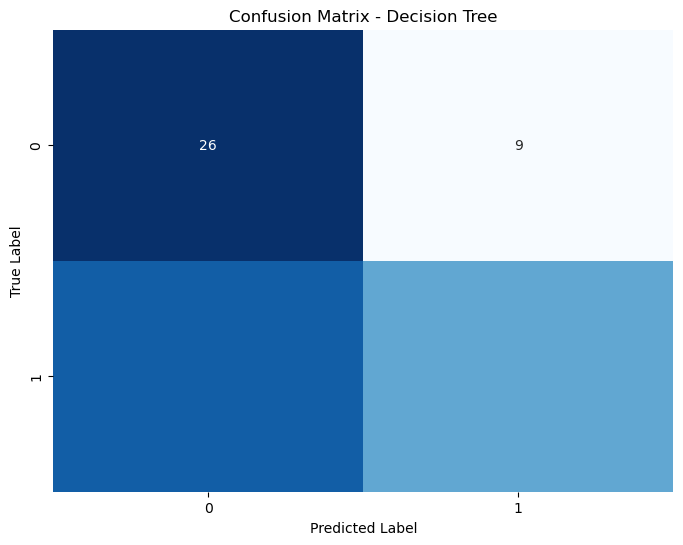

In [494]:
Confusion_Matrix(y_pred_Random_Forest, 'Decision Tree')

# 3.2 AdaBoost Classifier

In [495]:
# Initialize classifiers
adaboost_classifier = AdaBoostClassifier()

In [496]:
# Train classifiers
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier()

In [497]:
#prediction
y_pred_adaboost = adaboost_classifier.predict(X_test)

# Accuracy

In [498]:
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
accuracy_adaboost

0.5

# Roc Curve, AUC Score and Confusion Matrix for AdaBoost Classifier

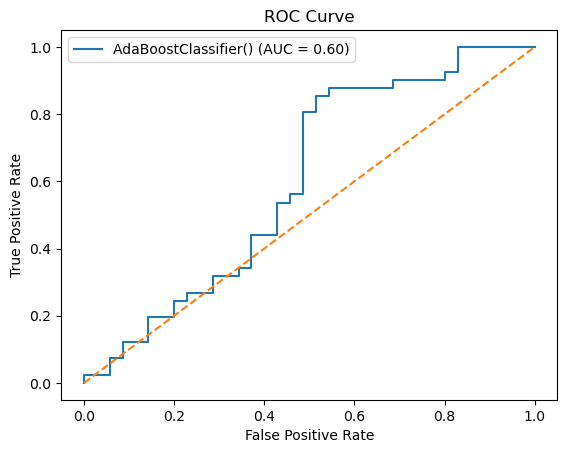

ROC AUC Score : 0.60


In [499]:
AdaBoost_AUC = ROC_Curve_AUC_Score(adaboost_classifier)

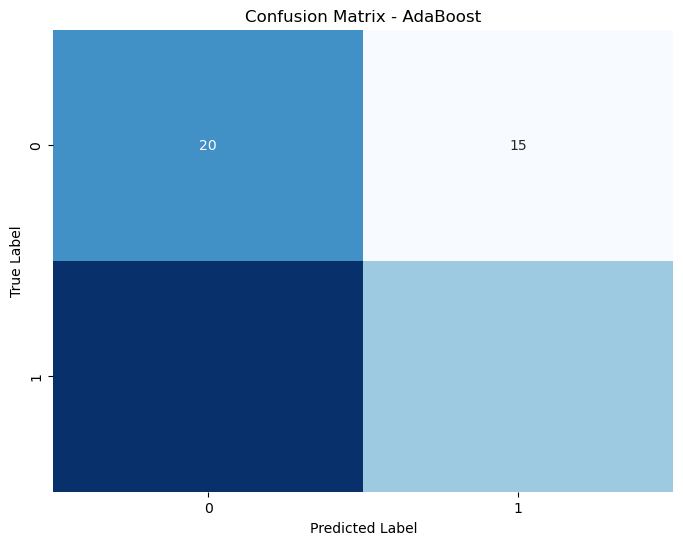

In [500]:
Confusion_Matrix(y_pred_adaboost, 'AdaBoost')

# Comparing all the classifiers Based on AUC Score

AUC Score: The AUC score quantifies the overall performance of a classifier across all possible threshold settings. It is calculated by computing the area under the ROC curve. A perfect classifier has an AUC score of 1, indicating perfect classification performance, while a completely random classifier has an AUC score of 0.5, indicating no discrimination ability.

Advantages of AUC: AUC is a useful metric because it is independent of the class distribution and threshold selection. It provides a single scalar value that summarizes the performance of a classifier, making it easy to compare different classifiers.

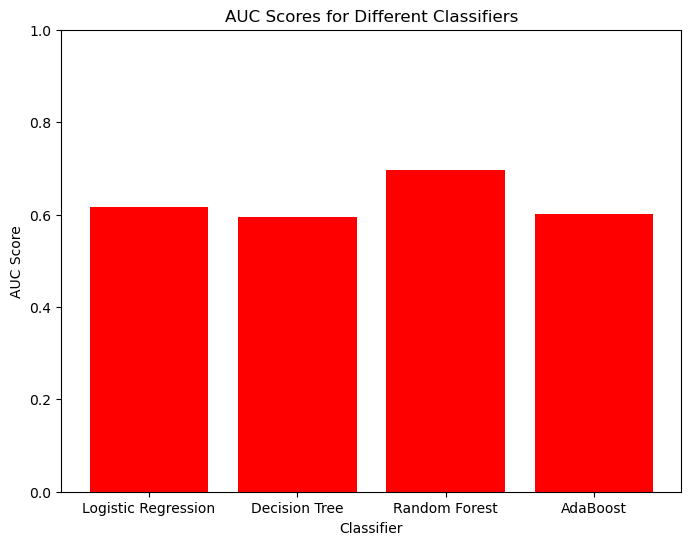

In [501]:
AUC_scores = {
    'Logistic Regression': Log_Reg_AUC,
    'Decision Tree': Decision_tree_AUC,
    'Random Forest': rf_AUC,
    'AdaBoost': AdaBoost_AUC
}

# Plot graph
plt.figure(figsize=(8, 6))
plt.bar(AUC_scores.keys(), AUC_scores.values(), color='red')
plt.xlabel('Classifier')
plt.ylabel('AUC Score')
plt.title('AUC Scores for Different Classifiers')
plt.ylim(0.0, 1.0) 
plt.show()

# Comparing Accuray of all Classifiers

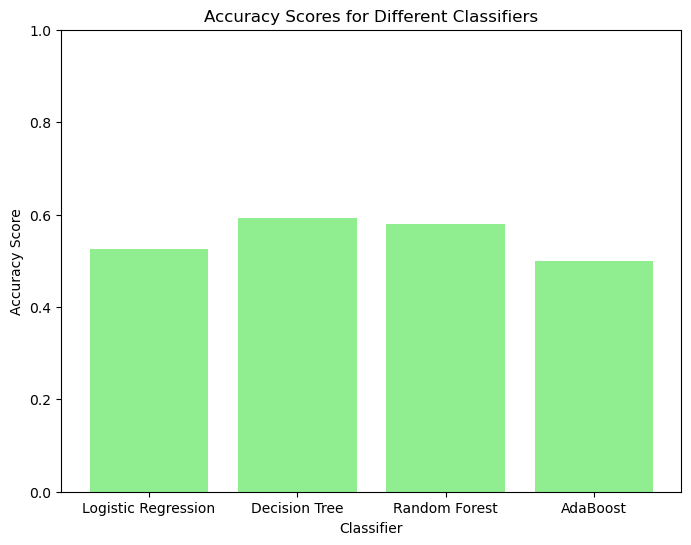

In [502]:
accuracy_scores = {
    'Logistic Regression': accuracy_logistic_regression,
    'Decision Tree': accuracy_decision_tree,
    'Random Forest': accuracy_Random_Forest_Tree,
    'AdaBoost': accuracy_adaboost
}

# Plot graph
plt.figure(figsize=(8, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='lightgreen')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Classifiers')
plt.ylim(0.0, 1.0)  # Set y-axis limit
plt.show()

# **Predictions from the user input by all the classifiers**

In [475]:
# Initialize an empty dictionary to store user input
user_input = {}

# Ask questions to collect user input
print("Please provide the following information:")

user_input['Fever'] = int(input("Do you have Fever? (Enter 1 for Yes, 0 for No): "))
user_input['Cough'] = int(input("Do you have Cough? (Enter 1 for Yes, 0 for No): "))
user_input['Fatigue'] = int(input("Do you have Fatigue? (Enter 1 for Yes, 0 for No): "))
user_input['Difficulty Breathing'] = int(input("Do you have Difficulty Breathing? (Enter 1 for Yes, 0 for No): "))
user_input['Age'] = int(input("What is your Age? (Enter your age): "))
user_input['Gender'] = int(input("What is your Gender? (Enter 1 for Female, 0 for Male): "))
user_input['Blood Pressure'] = int(input("What is your Blood Pressure? (Enter 1 for High, 0 for Normal, -1 for Low): "))
user_input['Cholesterol Level'] = int(input("What is your Cholesterol Level? (Enter 1 for High, 0 for Normal): "))

print("User Input:", user_input)

user_df = pd.DataFrame([user_input])

Please provide the following information:


Do you have Fever? (Enter 1 for Yes, 0 for No):  1
Do you have Cough? (Enter 1 for Yes, 0 for No):  1
Do you have Fatigue? (Enter 1 for Yes, 0 for No):  1
Do you have Difficulty Breathing? (Enter 1 for Yes, 0 for No):  0
What is your Age? (Enter your age):  25
What is your Gender? (Enter 1 for Female, 0 for Male):  0
What is your Blood Pressure? (Enter 1 for High, 0 for Normal, -1 for Low):  -1
What is your Cholesterol Level? (Enter 1 for High, 0 for Normal):  0


User Input: {'Fever': 1, 'Cough': 1, 'Fatigue': 1, 'Difficulty Breathing': 0, 'Age': 25, 'Gender': 0, 'Blood Pressure': -1, 'Cholesterol Level': 0}


In [474]:
# Make predictions using each classifier for user input
predictions = {}

#RandomForest Tree
predictions['Random Forest'] = rf_classifier.predict([list(user_input.values())])[0]

# Decision Tree
predictions['Decision Tree'] = decision_tree_classifier.predict([list(user_input.values())])[0]

# AdaBoost
predictions['AdaBoost'] = adaboost_classifier.predict([list(user_input.values())])[0]

# Logistic Regression
predictions['Logistic Regression'] = logistic_regression_classifier.predict([list(user_input.values())])[0]

# Print predictions
for model, prediction in predictions.items():
    print(f"Prediction using {model}:", prediction)


Prediction using Random Forest: 1
Prediction using Decision Tree: 1
Prediction using AdaBoost: 1
Prediction using Logistic Regression: 1


C:\Users\rtaru\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rtaru\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\rtaru\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\rtaru\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
